In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [25]:
df=pd.read_csv('Downloads/walmart_weekly_sales_data.csv')

In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN,NaN,NaN,NaN,State
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN,NaN,NaN,NaN,1 Account length
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN,NaN,NaN,NaN,2 Area code
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,NaN,NaN,NaN,NaN,3 International plan


In [27]:
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data cleaning

In [28]:
X_train.isnull().sum()

Store              0
Date               0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Unnamed: 8      5148
Unnamed: 9      5148
Unnamed: 10     5144
Unnamed: 11     5148
Unnamed: 12     5148
Unnamed: 13     5133
dtype: int64

In [29]:
X_train.describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unnamed: 8,Unnamed: 9,Unnamed: 11,Unnamed: 12
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,0.0,0.0,0.0,0.0
mean,23.127428,0.067211,60.435437,3.363519,171.543292,7.996731,NaN,NaN,NaN,NaN
std,12.989904,0.250411,18.474075,0.456837,39.263725,1.873195,NaN,NaN,NaN,NaN
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000,NaN,NaN,NaN,NaN
25%,12.000000,0.000000,47.250000,2.938000,131.814218,6.891000,NaN,NaN,NaN,NaN
50%,23.000000,0.000000,62.530000,3.459000,182.783277,7.874000,NaN,NaN,NaN,NaN
75%,34.000000,0.000000,74.690000,3.738000,212.377784,8.622000,NaN,NaN,NaN,NaN
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000,NaN,NaN,NaN,NaN


In [30]:
X_train=X_train.dropna(axis=1)

In [31]:
X_test=X_test.dropna(axis=1)

In [32]:
X_train.describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,23.127428,0.067211,60.435437,3.363519,171.543292,7.996731
std,12.989904,0.250411,18.474075,0.456837,39.263725,1.873195
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.250000,2.938000,131.814218,6.891000
50%,23.000000,0.000000,62.530000,3.459000,182.783277,7.874000
75%,34.000000,0.000000,74.690000,3.738000,212.377784,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [33]:
X_test.describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,22.490287,0.080808,61.577164,3.338959,171.718800,8.008832
std,12.973823,0.272646,18.306566,0.467312,39.741545,1.887304
min,1.000000,0.000000,5.540000,2.513000,126.064000,4.077000
25%,11.000000,0.000000,47.930000,2.903000,131.193097,6.934000
50%,22.000000,0.000000,63.350000,3.381000,182.046418,7.874000
75%,34.000000,0.000000,75.865000,3.723000,213.624741,8.583500
max,45.000000,1.000000,100.070000,4.468000,226.923979,14.313000


In [34]:
X_train.dtypes

Store             int64
Date             object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [35]:
X_test.dtypes

Store             int64
Date             object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [36]:
X_train['Date'] = pd.to_datetime(X_train['Date'])

In [37]:
X_test['Date'] = pd.to_datetime(X_test['Date'])

In [38]:
X_train.dtypes

Store                    int64
Date            datetime64[ns]
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [39]:
y_train.isnull().sum()

0

In [40]:
y_train

1033     836707.85
915      558963.83
5903     588592.61
2083     605413.17
5943     526641.23
           ...    
3772    1709365.19
5191     508213.14
5226     510787.46
5390     342667.35
860      506760.54
Name: Weekly_Sales, Length: 5148, dtype: float64

# feature engineering

In [41]:
X_train['year'] = X_train['Date'].dt.year
X_train['month'] = X_train['Date'].dt.month
X_train['day'] = X_train['Date'].dt.day

In [42]:
X_test['year'] = X_test['Date'].dt.year
X_test['month'] = X_test['Date'].dt.month
X_test['day'] = X_test['Date'].dt.day

In [43]:
X_train=X_train.drop(columns=['Date'])

In [44]:
X_train.head()


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
1033,8,0,75.32,2.582,214.878556,6.315,2010,9,17
915,7,0,20.70,3.372,192.058484,8.818,2011,3,11
5903,42,0,61.24,3.130,126.546161,9.003,2010,11,12
2083,15,0,69.19,3.906,136.213613,7.806,2011,8,26
5943,42,0,87.40,3.743,129.240581,8.257,2011,8,19


In [45]:
X_test=X_test.drop(columns=['Date'])

# model building

In [46]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [47]:
y_predicted = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

In [49]:
mse

94674768369.69821

In [50]:
r2

0.7061200468249249

In [51]:
mae

207434.57998844644

# QUESTIONS ON THE GIVEN DATASET

In [52]:
whole_df=pd.read_csv('Downloads/walmart_weekly_sales_data.csv')

In [53]:
whole_df=whole_df.dropna(axis=1)


In [54]:
whole_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,10/5/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,10/12/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,10/19/2012,718125.53,0,56.47,3.969,192.330854,8.667


In [55]:
whole_df['Date'] = pd.to_datetime(whole_df['Date'])

In [56]:
whole_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [57]:
whole_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [58]:
whole_df.shape

(6435, 8)

In [59]:
whole_df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [60]:
whole_df['year'] = whole_df['Date'].dt.year
whole_df['month'] = whole_df['Date'].dt.month
whole_df['day'] = whole_df['Date'].dt.day

In [61]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,2/5/2010,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2/12/2010,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN,NaN,NaN,NaN,State
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN,NaN,NaN,NaN,1 Account length
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN,NaN,NaN,NaN,2 Area code
4,1,3/5/2010,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,NaN,NaN,NaN,NaN,3 International plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,713173.95,0,64.88,3.997,192.013558,8.684,NaN,NaN,NaN,NaN,NaN,NaN
6431,45,10/5/2012,733455.07,0,64.89,3.985,192.170412,8.667,NaN,NaN,NaN,NaN,NaN,NaN
6432,45,10/12/2012,734464.36,0,54.47,4.000,192.327265,8.667,NaN,NaN,NaN,NaN,NaN,NaN
6433,45,10/19/2012,718125.53,0,56.47,3.969,192.330854,8.667,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
whole_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
year                     int32
month                    int32
day                      int32
dtype: object

## 1. Which store had the highest sales per week?(Store number) o Was it a holiday week for that store? o In which month was this week? o How much did they make in sales that week?

In [63]:
highest_sales_week = whole_df[whole_df['Weekly_Sales'] == whole_df['Weekly_Sales'].max()]

store_num = highest_sales_week['Store'].values[0]
is_holiday = highest_sales_week['Holiday_Flag'].values[0] == 1  # Convert 1 to True for holiday
month = highest_sales_week['month'].values[0]
sales_amount = highest_sales_week['Weekly_Sales'].values[0]

print(f"Store with highest sales per week: {store_num}")
print(f"Holiday week: {is_holiday}")
print(f"Month: {month}")
print(f"Sales amount: ${sales_amount:.2f}")


Store with highest sales per week: 14
Holiday week: False
Month: 12
Sales amount: $3818686.45


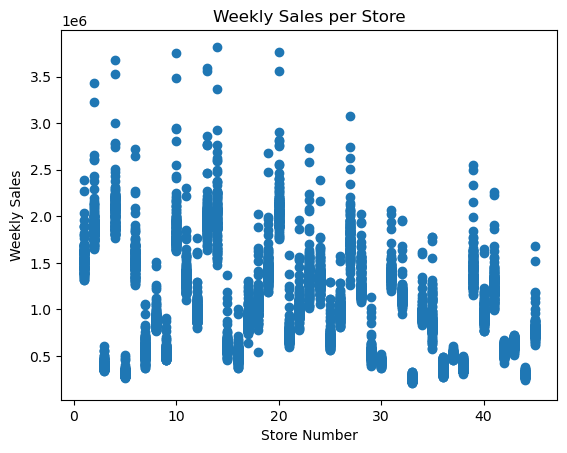

In [64]:
plt.scatter(whole_df['Store'], whole_df['Weekly_Sales'])
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Store')
plt.show()

## 2. If weekly sales increase by 7%, what would their new sales be? (engineer a new column with an appropriate name)

In [65]:
whole_df['Increased_Sales'] = whole_df['Weekly_Sales'] * 1.07

In [66]:
whole_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Increased_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1.758749e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,1.756894e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1.724806e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1.508409e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,1.663643e+06


## 

In [67]:
whole_df['Labour_Cost'] = whole_df['Weekly_Sales'] * 0.286
whole_df['Product_Cost'] = whole_df['Weekly_Sales'] * 0.39
whole_df['Maintenance_Cost'] = whole_df['Weekly_Sales'] * 0.124

whole_df['Profit'] = whole_df['Weekly_Sales'] - -whole_df['Labour_Cost'] - whole_df['Product_Cost'] - whole_df['Maintenance_Cost']

In [68]:
whole_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Increased_Sales,Labour_Cost,Product_Cost,Maintenance_Cost,Profit
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1.758749e+06,470095.59740,641039.4510,203817.67160,1.268929e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,1.756894e+06,469599.82784,640363.4016,203602.72256,1.267591e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,1.724806e+06,461022.89662,628667.5863,199884.05308,1.244439e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,1.508409e+06,403182.09074,549793.7601,174806.22116,1.088310e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,1.663643e+06,444674.71048,606374.6052,192796.02832,1.200311e+06


## 4. Temperatures are in Fahrenheit, convert them to Celsius if you need to, using the formula below and answer the following question. ( optional: engineer a new column with an appropriate name) 

In [69]:
whole_df['Temperature'] = (whole_df['Temperature'] - 32) * 5/9

In [70]:
whole_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Increased_Sales,Labour_Cost,Product_Cost,Maintenance_Cost,Profit
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,2010,2,5,1.758749e+06,470095.59740,641039.4510,203817.67160,1.268929e+06
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,2010,2,12,1.756894e+06,469599.82784,640363.4016,203602.72256,1.267591e+06
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2010,2,19,1.724806e+06,461022.89662,628667.5863,199884.05308,1.244439e+06
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2010,2,26,1.508409e+06,403182.09074,549793.7601,174806.22116,1.088310e+06
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,2010,3,5,1.663643e+06,444674.71048,606374.6052,192796.02832,1.200311e+06


### Which store had the lowest temperature (cold day)? 
### Which store had the highest temperature (hot day)?


In [71]:
lowest_temp_store = whole_df[whole_df['Temperature'] == whole_df['Temperature'].min()]
highest_temp_store = whole_df[whole_df['Temperature'] == whole_df['Temperature'].max()]

lowest_temp_sales = lowest_temp_store['Weekly_Sales'].values[0]
highest_temp_sales = highest_temp_store['Weekly_Sales'].values[0]

print(f"Store with lowest temperature: {lowest_temp_store['Store'].values[0]}")
print(f"Store with highest temperature: {highest_temp_store['Store'].values[0]}")
print(f"Lowest temperature sales: ${lowest_temp_sales:.2f}")
print(f"Highest temperature sales: ${highest_temp_sales:.2f}")


Store with lowest temperature: 7
Store with highest temperature: 33
Lowest temperature sales: $558027.77
Highest temperature sales: $280937.84


### How do the weekly sales of these stores compare in these temperature: 
### Can you draw any meaning on how the weather affects Walmart's sales?

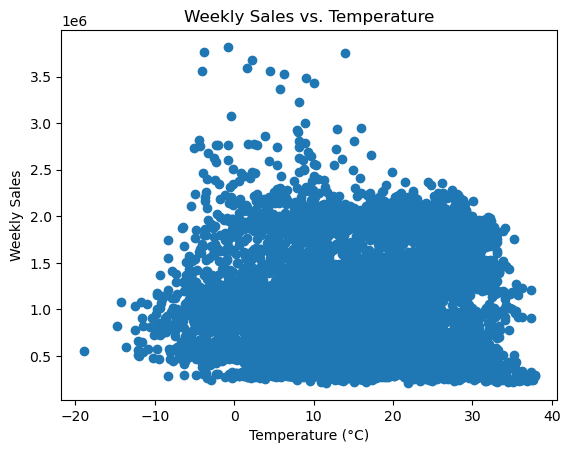

In [72]:
plt.scatter(whole_df['Temperature'], whole_df['Weekly_Sales'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature')
plt.show()

In [73]:
correlation, _ = pearsonr(whole_df['Temperature'], whole_df['Weekly_Sales'])
print(f"Correlation coefficient between temperature and sales: {correlation:.4f}")

Correlation coefficient between temperature and sales: -0.0638


## According to the visualizations temperature and weekly sales have very weak correlation

# 5. Which store had the highest sales week in 2012?

In [74]:
data_2012 = whole_df[whole_df['year'] == 2012]
highest_sales_week_2012 = data_2012[data_2012['Weekly_Sales'] == data_2012['Weekly_Sales'].max()]

store_details = highest_sales_week_2012[['Store', 'Weekly_Sales', 'Date', 'month']]

print(f"Store number: {store_details['Store'].values[0]}")
print(f"Weekly Sales: ${store_details['Weekly_Sales'].values[0]:.2f}")

Store number: 20
Weekly Sales: $2565259.92
